In [1]:
import pandas as pd
import numpy as np
import networkx as nx
from tqdm import tqdm
import warnings
from statistics import median

import matplotlib.pyplot as plt
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\deepali kumari\python\left\new_method\Batting_Bowling.csv")
df.head()

Bowling Team  Inning  Balls    Batting Team    batsman non_strikers  \
0  Chennai Super Kings       1    0.1  Mumbai Indians  RG Sharma    Q de Kock   
1  Chennai Super Kings       1    0.2  Mumbai Indians  RG Sharma    Q de Kock   
2  Chennai Super Kings       1    0.3  Mumbai Indians  Q de Kock    RG Sharma   
3  Chennai Super Kings       1    0.4  Mumbai Indians  Q de Kock    RG Sharma   
4  Chennai Super Kings       1    0.5  Mumbai Indians  Q de Kock    RG Sharma   

     bowlers  batsman_run  Extra dismissal_kind player_dismissed  
0  DL Chahar            4      0            NaN              NaN  
1  DL Chahar            1      0            NaN              NaN  
2  DL Chahar            2      0            NaN              NaN  
3  DL Chahar            4      0            NaN              NaN  
4  DL Chahar            0      0            NaN              NaN

In [3]:
df=df.iloc[:,[0,3,4,5,6,7,8,10]]
df.head()

Bowling Team    Batting Team    batsman non_strikers    bowlers  \
0  Chennai Super Kings  Mumbai Indians  RG Sharma    Q de Kock  DL Chahar   
1  Chennai Super Kings  Mumbai Indians  RG Sharma    Q de Kock  DL Chahar   
2  Chennai Super Kings  Mumbai Indians  Q de Kock    RG Sharma  DL Chahar   
3  Chennai Super Kings  Mumbai Indians  Q de Kock    RG Sharma  DL Chahar   
4  Chennai Super Kings  Mumbai Indians  Q de Kock    RG Sharma  DL Chahar   

   batsman_run  Extra player_dismissed  
0            4      0              NaN  
1            1      0              NaN  
2            2      0              NaN  
3            4      0              NaN  
4            0      0              NaN

In [4]:
df.isnull().sum()

Bowling Team            0
Batting Team            0
batsman                 0
non_strikers            0
bowlers                 0
batsman_run             0
Extra                   0
player_dismissed    13882
dtype: int64

In [5]:
df.shape

(14559, 8)

In [6]:
df['Batting Team'].unique()

array(['Mumbai Indians', 'Chennai Super Kings', 'Delhi Capitals',
       'Kings XI Punjab', 'Kolkata Knight Riders',
       'Royal Challengers Bangalore', 'Sunrisers Hyderabad',
       'Rajasthan Royals'], dtype=object)

In [7]:
mytable = df.groupby(['bowlers','player_dismissed']).size()
mytable

bowlers            player_dismissed
A Mishra           DA Warner           1
                   MK Pandey           1
                   Shubman Gill        1
A Nortje           AB de Villiers      2
                   CH Morris           1
                   D Padikkal          1
                   EJG Morgan          1
                   HH Pandya           1
                   I Udana             1
                   JC Buttler          1
                   KM Jadhav           1
                   M Vijay             1
                   MS Dhoni            1
                   Mohammed Siraj      1
                   PJ Cummins          1
                   Q de Kock           1
                   RA Tripathi         1
                   RG Sharma           1
                   RV Uthappa          1
                   SA Yadav            1
                   SP Narine           1
                   SPD Smith           1
                   SR Watson           1
                   Sh

In [8]:
t=df['bowlers'].unique()
np.count_nonzero(t) 

98

In [9]:
df_bowl=pd.read_csv(r"C:\Users\deepali kumari\python\left\new_method\NewBowler1.csv")
df_bowl.head()

Bowlers  Bowling_Average
0  DL Chahar            28.24
1  SM Curran            29.00
2    L Ngidi            16.15
3  PP Chawla            27.33
4  RA Jadeja            30.44

In [10]:
s=df_bowl['Bowlers'].unique()
np.count_nonzero(s)

98

In [11]:
for i in range(0,98):
    if (s[i] != t[i]):
        print(s[i])

In [12]:
import os
#os.remove("PIB_index.csv")
#os.remove("career_bat_avg.csv")
arr=df['Batting Team'].unique()
from matplotlib.pyplot import figure
from numpy import array
pib=[]

for b in range(0,8):
    df_team=df[df['Batting Team']==arr[b]]    
    bat=df_team['batsman'].unique()
    ball=df_team['bowlers'].unique()
    x=np.count_nonzero(bat)
    y=np.count_nonzero(ball)
    adj=pd.DataFrame(np.zeros((x,y)),index=bat,columns=ball)
    cba=pd.DataFrame(np.zeros((x,1)),index=bat,columns=['career_bat_avg']).astype(float)
    for i in bat:
        for j in ball:
            diss=1
            for k in df_team.index:
                if((df_team.loc[k,'batsman']==i) & (df_team.loc[k,'bowlers']==j)):
                    adj.loc[i,j]=adj.loc[i,j]+df_team.loc[k,'batsman_run']
                    if(df_team.loc[k,'player_dismissed']==i):
                        diss=diss+1       
            
            for k in df_bowl.index:
                if(df_bowl.loc[k,'Bowlers']==j):
                    bowl_avg=df_bowl.loc[k,'Bowling_Average']
                    break;
            cba.loc[i,'career_bat_avg']=cba.loc[i,'career_bat_avg']+(adj.loc[i,j]/diss)
            adj.loc[i,j]=(adj.loc[i,j]/diss)/bowl_avg
        cba.loc[i,'career_bat_avg']=cba.loc[i,'career_bat_avg']/y;
                    
    pib.append(adj)
    adj.to_csv("PIB_index.csv",mode='a')    
    cba.to_csv("career_bat_avg.csv",mode='a')      

In [13]:
print(np.array(pib).shape)

(8,)


In [14]:
pib[0]

DL Chahar  SM Curran   L Ngidi  PP Chawla  RA Jadeja  \
RG Sharma         0.212465   0.172414  0.061920   0.000000   0.000000   
Q de Kock         1.026912   0.034483  0.928793   0.073180   0.065703   
SA Yadav          0.017705   0.206897  0.000000   0.073180   0.262812   
SS Tiwary         0.141643   0.172414  0.681115   0.182949   0.279238   
HH Pandya         0.000000   0.000000  0.000000   0.036590   0.213535   
KA Pollard        0.000000   0.172414  0.061920   0.329308   0.065703   
KH Pandya         0.000000   0.000000  0.000000   0.036590   0.065703   
JL Pattinson      0.000000   0.172414  0.185759   0.000000   0.000000   
RD Chahar         0.035411   0.000000  0.061920   0.000000   0.000000   
TA Boult          0.000000   0.000000  0.000000   0.000000   0.000000   
JJ Bumrah         0.177054   0.000000  0.000000   0.000000   0.000000   
Ishan Kishan      0.672805   0.000000  0.000000   0.000000   0.427070   
NM Coulter-Nile   0.000000   0.000000  0.000000   0.000000   0.000000   
DS Kulkarni       0.000000   0.000000  0.000000   0.000000   0.000000   

                 Sandeep Sharma  JO Holder  S Nadeem  T Natarajan  \
RG Sharma              0.109830   0.070497  0.000000     0.000000   
Q de Kock              0.473641   0.140994  0.000000     0.145391   
SA Yadav               0.370675   0.211491  0.161334     0.145391   
SS Tiwary              0.000000   0.000000  0.026889     0.000000   
HH Pandya              0.535420   0.000000  0.000000     0.378017   
KA Pollard             0.576606   0.123370  0.053778     1.104972   
KH Pandya              0.000000   0.000000  0.000000     0.000000   
JL Pattinson           0.000000   0.105746  0.000000     0.029078   
RD Chahar              0.000000   0.000000  0.000000     0.000000   
TA Boult               0.000000   0.000000  0.000000     0.000000   
JJ Bumrah              0.000000   0.000000  0.000000     0.000000   
Ishan Kishan           0.096101   0.000000  0.107556     0.145391   
NM Coulter-Nile        0.041186   0.000000  0.000000     0.000000   
DS Kulkarni            0.000000   0.105746  0.000000     0.000000   

                 Rashid Khan   ...     HV Patel  MP Stoinis  P Dubey  \
RG Sharma           0.000000   ...     0.000000    0.131449     0.17   
Q de Kock           0.097609   ...     0.443232    0.032862     0.08   
SA Yadav            0.488043   ...     0.272758    0.427210     0.05   
SS Tiwary           0.000000   ...     0.000000    0.000000     0.00   
HH Pandya           0.097609   ...     0.000000    0.032862     0.00   
KA Pollard          0.195217   ...     0.000000    0.098587     0.00   
KH Pandya           0.000000   ...     0.000000    0.147880     0.00   
JL Pattinson        0.000000   ...     0.000000    0.000000     0.00   
RD Chahar           0.000000   ...     0.000000    0.000000     0.00   
TA Boult            0.000000   ...     0.000000    0.000000     0.00   
JJ Bumrah           0.000000   ...     0.000000    0.000000     0.00   
Ishan Kishan        1.610542   ...     0.204569    0.985869     0.28   
NM Coulter-Nile     0.000000   ...     0.000000    0.000000     0.00   
DS Kulkarni         0.000000   ...     0.000000    0.000000     0.00   

                   S Kaul  Abdul Samad  KS Williamson   I Udana  NA Saini  \
RG Sharma        0.000000     0.000000           0.00  0.226950  0.000000   
Q de Kock        0.668779     0.260417           0.12  0.198582  0.000000   
SA Yadav         0.369588     0.000000           0.00  0.000000  0.000000   
SS Tiwary        0.000000     0.000000           0.00  0.000000  0.000000   
HH Pandya        0.000000     0.000000           0.00  0.000000  0.021906   
KA Pollard       0.035199     0.000000           0.00  0.198582  0.087623   
KH Pandya        0.703977     0.000000           0.00  0.000000  0.000000   
JL Pattinson     0.000000     0.000000           0.00  0.000000  0.000000   
RD Chahar        0.000000     0.000000           0.00  0.000000  0.000000   
TA Boult         0.000000     0.00

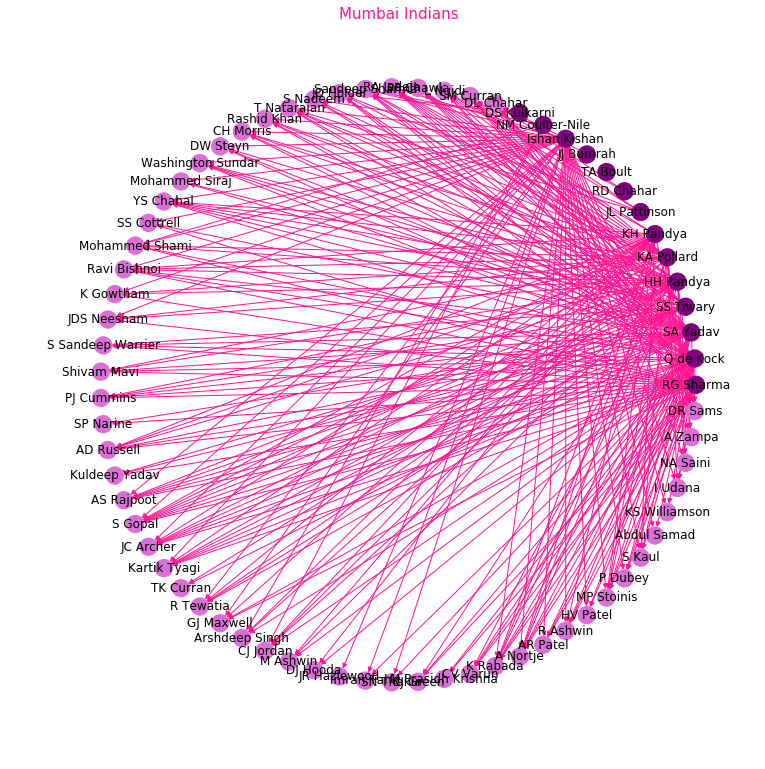

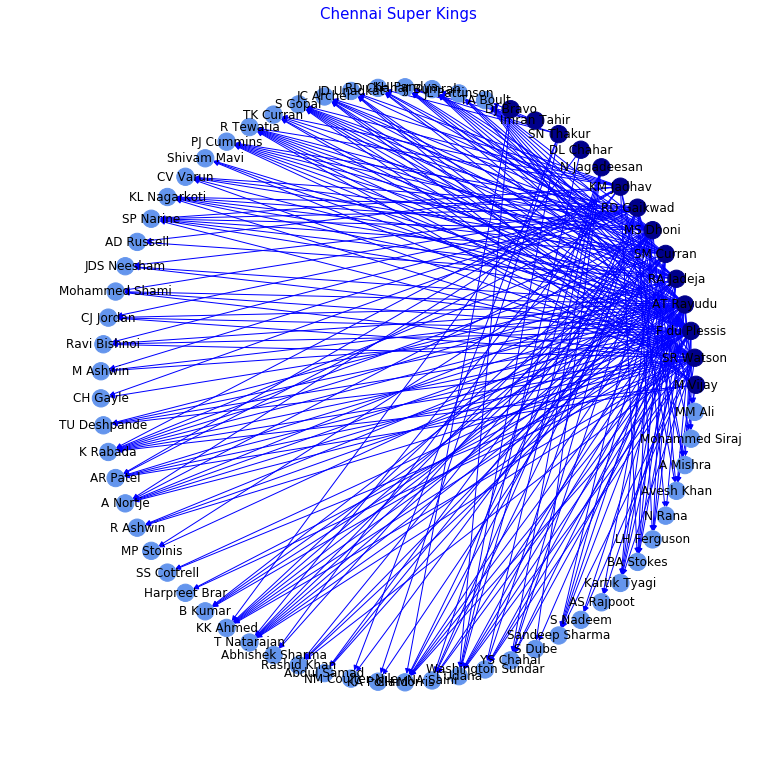

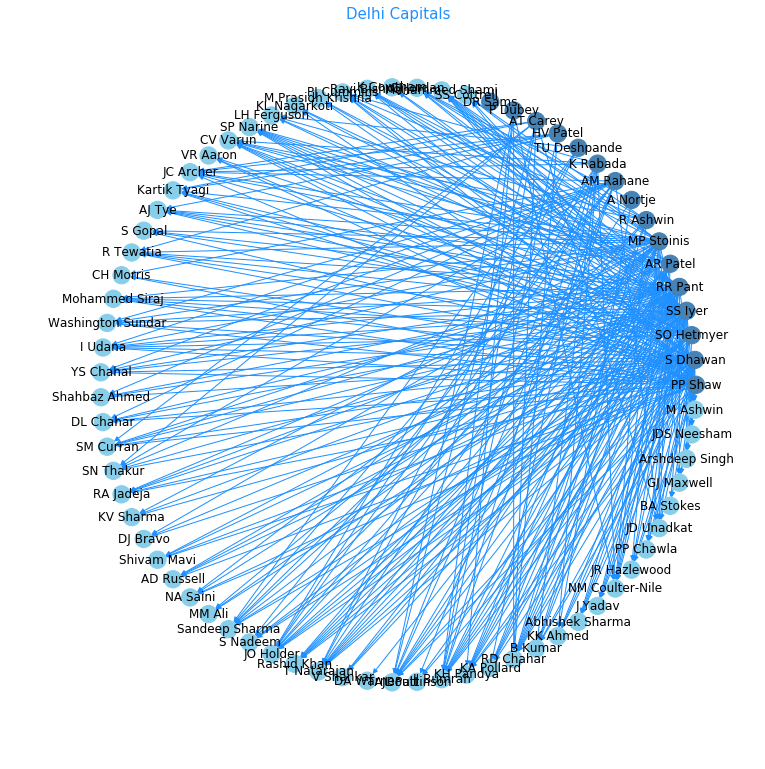

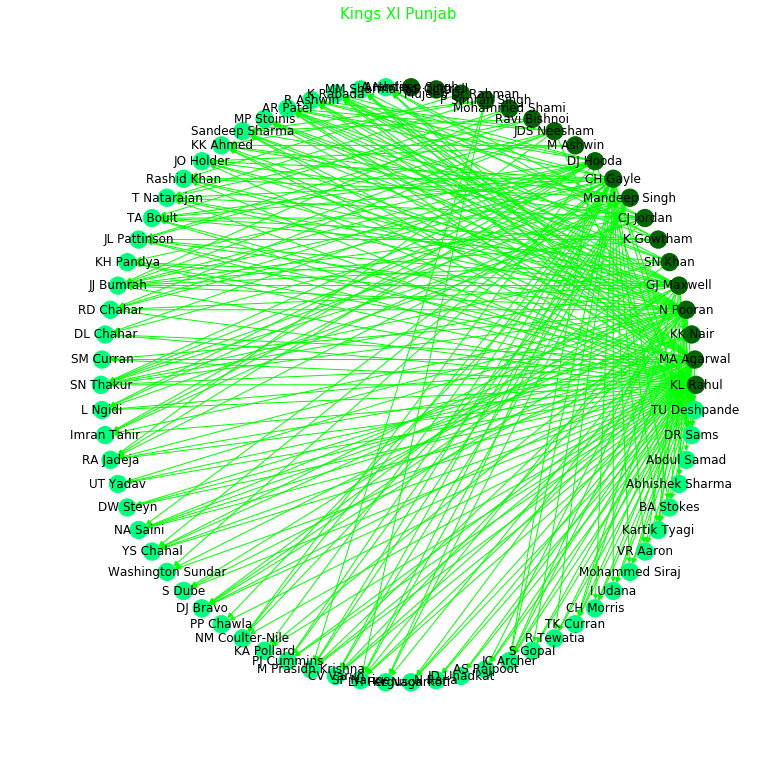

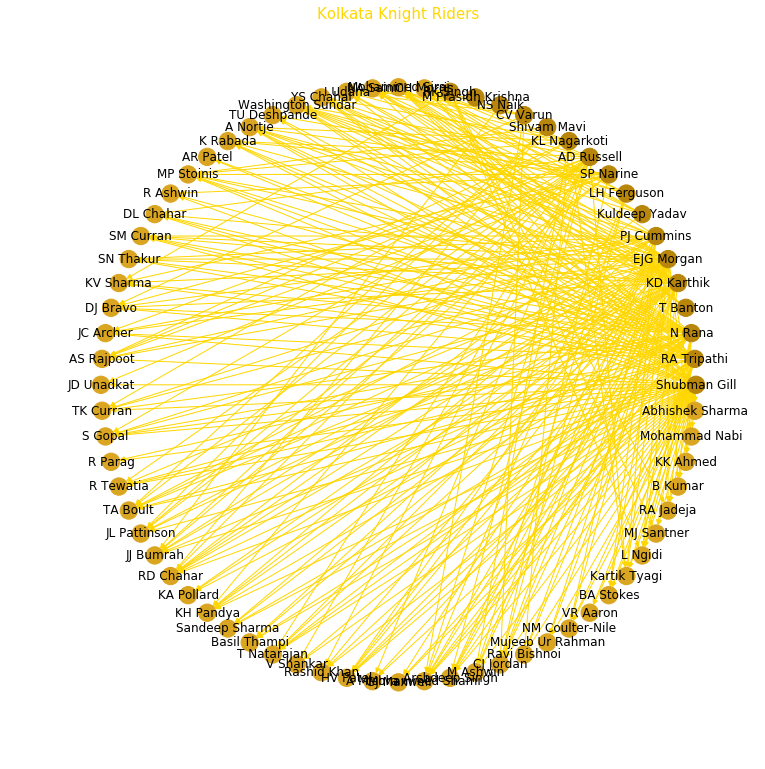

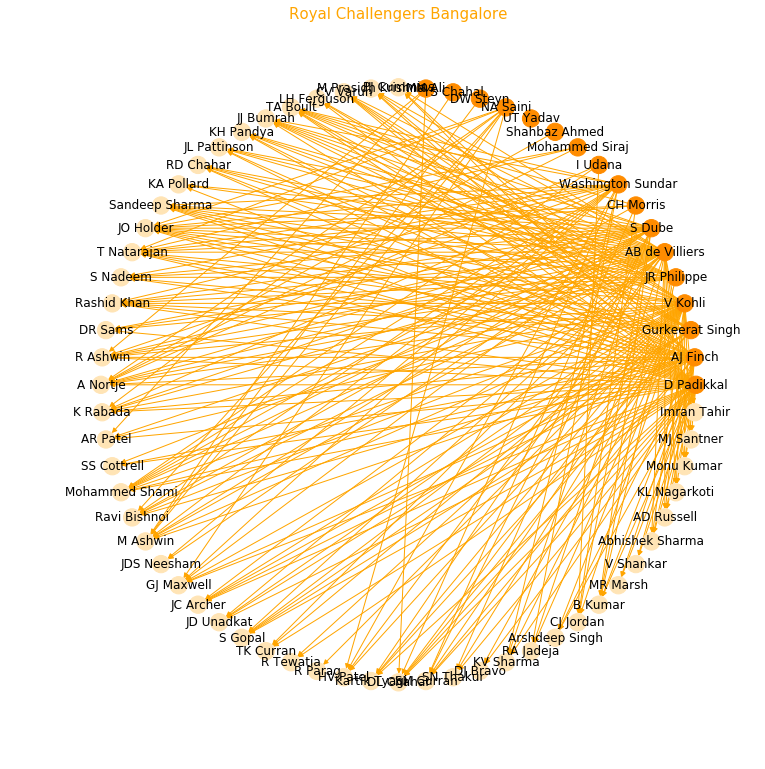

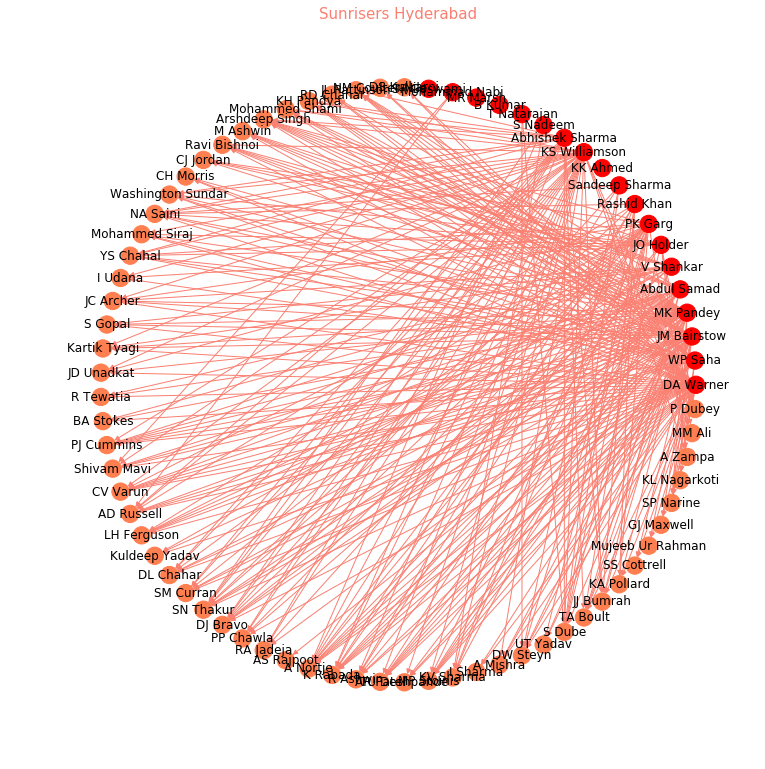

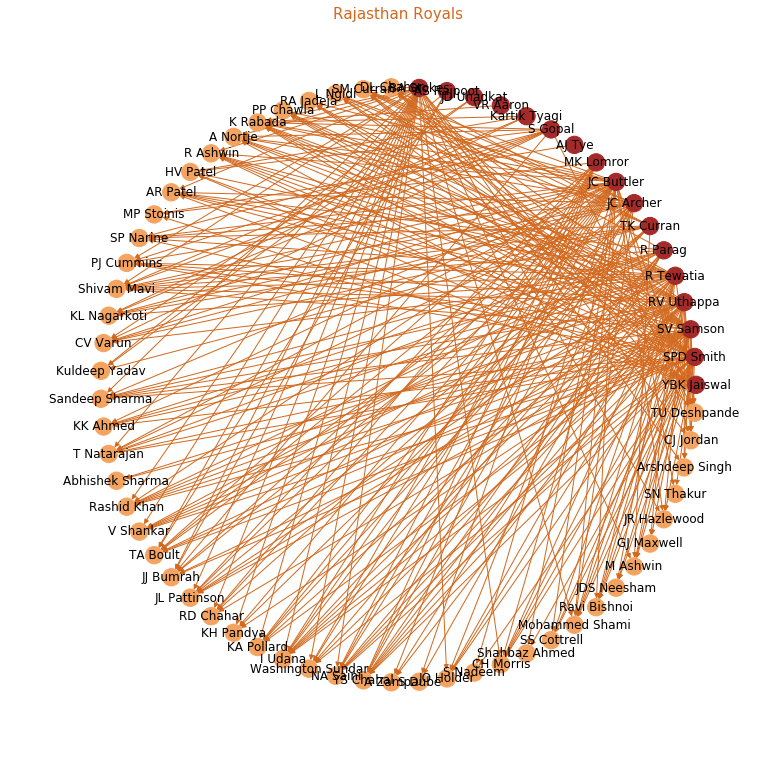

In [15]:
color_bat=['purple','darkblue','steelblue','darkgreen','darkgoldenrod','darkorange','red','brown']
color_ball=['orchid','cornflowerblue','skyblue','springgreen','goldenrod','moccasin','coral','sandybrown']
color_edge=['deeppink','blue','dodgerblue','lime','gold','orange','salmon','chocolate']
for b in range(0,8):
    df_team=df[df['Batting Team']==arr[b]]    
    bat=df_team['batsman'].unique()
    ball=df_team['bowlers'].unique()
    G=nx.DiGraph()
    G.add_nodes_from(bat)
    G.add_nodes_from(ball)
    adj=pib[b]
    color_map=[]
    total=bat.size+ball.size
    for i in range(total):
        if i < bat.size:
            color_map.append(color_bat[b])
        else: 
            color_map.append(color_ball[b])
    for i in bat:
        for j in ball:
            #if(adj.loc[i,j]>=0.1+adj.stack().mean()):
            if(adj.loc[i,j]>0):
                G.add_edge(i,j,weight=adj.loc[i,j])
    plt.figure(figsize=(10,10))
    nx.draw_shell(G, node_color=color_map, edge_color=color_edge[b], with_labels=True)
    plt.title(arr[b], size=15, color=color_edge[b])
    plt.show()

In [16]:
#os.remove("PIB_centrality.csv")
pib_centrality=[]
for b in range(0,8):
    df_team=df[df['Batting Team']==arr[b]]    
    bat=df_team['batsman'].unique()
    ball=df_team['bowlers'].unique()
    G=nx.DiGraph()
    G.add_nodes_from(bat)
    G.add_nodes_from(ball)
    adj=pib[b]
    for i in bat:
        for j in ball:
            if(adj.loc[i,j]!=0):
                G.add_edge(i,j,weight=adj.loc[i,j])
    degree_centrality = pib[b].sum(axis=1)
    close_centrality = nx.closeness_centrality(G,distance='weight')
    eigen_centrality = nx.eigenvector_centrality(G, max_iter=250, tol=1e-06, nstart=None, weight='weight')
    pr = nx.pagerank(G, alpha=0.9,weight='weight')
    cent = pd.DataFrame(list(degree_centrality.items()),columns = ['person','degree_centrality'],index=degree_centrality.keys())
    cent['close_centrality'] = cent['person'].map(close_centrality)
    cent['eigen_vector_centrality'] = cent['person'].map(eigen_centrality)
    cent['pagerank']=cent['person'].map(pr)
    del cent['person']
    pib_centrality.append(cent)
    cent.to_csv("PIB_centrality.csv",mode='a')
pib_centrality

[                 degree_centrality  close_centrality  eigen_vector_centrality  \
 RG Sharma                 8.194059          1.675430                 0.000364   
 Q de Kock                14.015289          2.064072                 0.000364   
 SA Yadav                 14.884539          1.385906                 0.000364   
 SS Tiwary                 3.281718          1.258052                 0.000364   
 HH Pandya                 7.944504          1.841345                 0.000364   
 KA Pollard                9.833157          1.059099                 0.000364   
 KH Pandya                 3.355652          1.702884                 0.000364   
 JL Pattinson              0.492996          0.463637                 0.000364   
 RD Chahar                 0.097330          0.587103                 0.000364   
 TA Boult                  0.000000          0.000000                 0.000364   
 JJ Bumrah                 0.177054          0.080686                 0.000364   
 Ishan Kishan   

In [17]:
df_cba = pd.read_csv(r"C:\Users\deepali kumari\python\left\new_method\career_bat_avg.csv")
df_cba.drop(df_cba[df_cba['career_bat_avg']=='career_bat_avg'].index, inplace = True)
df_cba.rename(columns={'Unnamed: 0':'Batsman','career_bat_avg':'Batting_Average'}, inplace = True)
df_cba['Batting_Average'] = df_cba['Batting_Average'].astype(float)
'''for i in df_cba.index:
    a=df_cba.loc[i,'Batting_Average']
    print(type(a))'''
df_cba.head(20)

Batsman  Batting_Average
0         RG Sharma         4.976608
1         Q de Kock         7.593567
2          SA Yadav         7.508772
3         SS Tiwary         1.508772
4         HH Pandya         4.429825
5        KA Pollard         4.719298
6         KH Pandya         1.692982
7      JL Pattinson         0.210526
8         RD Chahar         0.035088
9          TA Boult         0.000000
10        JJ Bumrah         0.087719
11     Ishan Kishan         8.084795
12  NM Coulter-Nile         0.438596
13      DS Kulkarni         0.052632
15          M Vijay         0.536364
16        SR Watson         4.954545
17     F du Plessis         7.018182
18        AT Rayudu         5.527273
19        RA Jadeja         3.736364
20        SM Curran         2.927273

In [18]:
for b in range(0,8):
    df_team=df[df['Bowling Team']==arr[b]]    
    ball=df_team['bowlers'].unique()
    print(ball)

['TA Boult' 'JL Pattinson' 'JJ Bumrah' 'KH Pandya' 'RD Chahar'
 'DS Kulkarni' 'NM Coulter-Nile' 'KA Pollard' 'J Yadav']
['DL Chahar' 'SM Curran' 'L Ngidi' 'PP Chawla' 'RA Jadeja' 'SN Thakur'
 'KV Sharma' 'DJ Bravo' 'Imran Tahir' 'JR Hazlewood' 'MJ Santner'
 'Monu Kumar']
['A Nortje' 'MM Sharma' 'K Rabada' 'R Ashwin' 'AR Patel' 'MP Stoinis'
 'TU Deshpande' 'HV Patel' 'DR Sams' 'A Mishra' 'I Sharma' 'P Dubey'
 'Avesh Khan']
['SS Cottrell' 'Mohammed Shami' 'CJ Jordan' 'K Gowtham' 'Ravi Bishnoi'
 'Arshdeep Singh' 'M Ashwin' 'JDS Neesham' 'CH Gayle' 'GJ Maxwell'
 'Harpreet Brar' 'DJ Hooda' 'Mujeeb Ur Rahman']
['PJ Cummins' 'M Prasidh Krishna' 'CV Varun' 'LH Ferguson' 'KL Nagarkoti'
 'SP Narine' 'Shivam Mavi' 'AD Russell' 'Kuldeep Yadav'
 'S Sandeep Warrier' 'N Rana' 'CJ Green']
['CH Morris' 'Mohammed Siraj' 'NA Saini' 'I Udana' 'YS Chahal'
 'Washington Sundar' 'DW Steyn' 'Shahbaz Ahmed' 'UT Yadav' 'S Dube'
 'A Zampa' 'MM Ali']
['Sandeep Sharma' 'JO Holder' 'S Nadeem' 'T Natarajan' 'Rashid K

In [19]:
#os.remove("QIB_index.csv")
qib=[]
for b in range(0,8):
    df_team=df[df['Bowling Team']==arr[b]]    
    bat=df_team['batsman'].unique()
    ball=df_team['bowlers'].unique()
    x=np.count_nonzero(bat)
    y=np.count_nonzero(ball)
    adj1=pd.DataFrame(np.zeros((y,x)),index=ball,columns=bat)
    for i in ball:
        for j in bat:
            diss=0
            for k in df_team.index:
                if((df_team.loc[k,'batsman']==j) & (df_team.loc[k,'bowlers']==i)):
                    if(df_team.loc[k,'player_dismissed']==j):
                        diss=diss+1             
            for k in df_bowl.index:
                if(df_bowl.loc[k,'Bowlers']==i):
                    bowl_avg=df_bowl.loc[k,'Bowling_Average']
                    break;                    
            for k in df_cba.index:
                if(df_cba.loc[k,'Batsman']==j):
                    bat_avg=df_cba.loc[k,'Batting_Average']
                    break;            
            adj1.loc[i,j]=((diss*bat_avg)/bowl_avg).round(decimals=5);
    adj1['degree_centrality'] = adj1.sum(axis=1)
    qib.append(adj1)
    adj1.to_csv("QIB_index.csv",mode='a')

In [20]:
qib[0]

M Vijay  SR Watson  F du Plessis  AT Rayudu  RA Jadeja  \
TA Boult         0.00000    0.19794       0.28039    0.00000    0.14928   
JL Pattinson     0.01844    0.00000       0.00000    0.00000    0.00000   
JJ Bumrah        0.00000    0.00000       0.00000    0.23292    0.00000   
KH Pandya        0.00000    0.00000       0.00000    0.00000    0.11398   
RD Chahar        0.00000    0.00000       0.00000    0.20756    0.00000   
DS Kulkarni      0.00000    0.00000       0.00000    0.00000    0.00000   
NM Coulter-Nile  0.00000    0.00000       0.00000    0.00000    0.00000   
KA Pollard       0.00000    0.00000       0.00000    0.00000    0.00000   
J Yadav          0.00000    0.00000       0.00000    0.00000    0.00000   

                 SM Curran  MS Dhoni  DA Warner  WP Saha  JR Philippe  \
TA Boult           0.11695   0.00000    0.00000      0.0      0.00000   
JL Pattinson       0.00000   0.00000    0.27679      0.0      0.00000   
JJ Bumrah          0.12336   0.00000    0.00000      0.0      0.00000   
KH Pandya          0.00000   0.00000    0.00000      0.0      0.00000   
RD Chahar          0.00000   0.11402    0.00000      0.0      0.05485   
DS Kulkarni        0.00000   0.00000    0.00000      0.0      0.00000   
NM Coulter-Nile    0.00000   0.00000    0.00000      0.0      0.00000   
KA Pollard         0.00000   0.00000    0.00000      0.0      0.00000   
J Yadav            0.00000   0.00000    0.00000      0.0      0.00000   

                       ...          Abhishek Sharma  Abdul Samad  Rashid Khan  \
TA Boult               ...                  0.00000       0.0000          0.0   
JL Pattinson           ...                  0.00000       0.0000          0.0   
JJ Bumrah              ...                  0.04614       0.0643          0.0   
KH Pandya              ...                  0.00000       0.0000          0.0   
RD Chahar              ...                  0.00000       0.0000          0.0   
DS Kulkarni            ...                  0.00000       0.0000          0.0   
NM Coulter-Nile        ...                  0.00000       0.0000          0.0   
KA Pollard             ...                  0.00000       0.0000          0.0   
J Yadav                ...                  0.00000       0.0000          0.0   

                 Sandeep Sharma  RV Uthappa  BA Stokes  AJ Finch  AR Patel  \
TA Boult                    0.0     0.00000        0.0   0.18161   0.00000   
JL Pattinson                0.0     0.11436        0.0   0.00000   0.00000   
JJ Bumrah                   0.0     0.00000        0.0   0.00000   0.00000   
KH Pandya                   0.0     0.00000        0.0   0.00000   0.00000   
RD Chahar                   0.0     0.00000        0.0   0.00000   0.00000   
DS Kulkarni                 0.0     0.00000        0.0   0.00000   0.00000   
NM Coulter-Nile             0.0     0.00000        0.0   0.00000   0.06762   
KA Pollard                  0.0     0.00000        0.0   0.00000   0.04669   
J Yadav                     0.0     0.00000        0.0   0.00000   0.00000   

                 DR Sams  degree_centrality  
TA Boult             0.0            3.75908  
JL Pattinson         0.0            1.19785  
JJ Bumrah            0.0            5.34552  
KH Pandya            0.0            0.60855  
RD Chahar            0.0            1.91298  
DS Kulkarni          0.0            0.00000  
NM Coulter-Nile      0.0            0.65364  
KA Pollard           0.0            0.50160  
J Yadav              0.0            0.19135  

[9 rows x 76 columns]

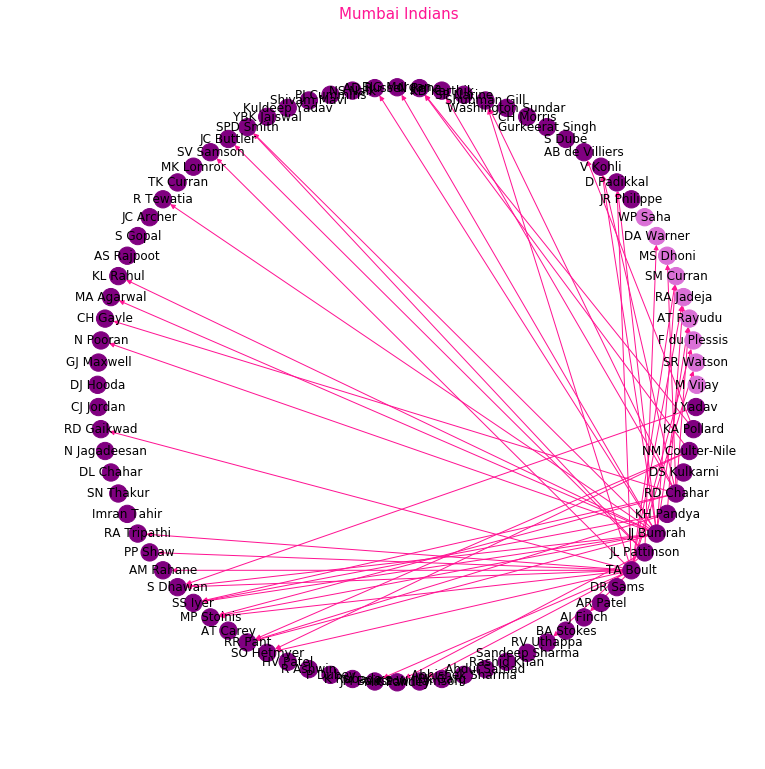

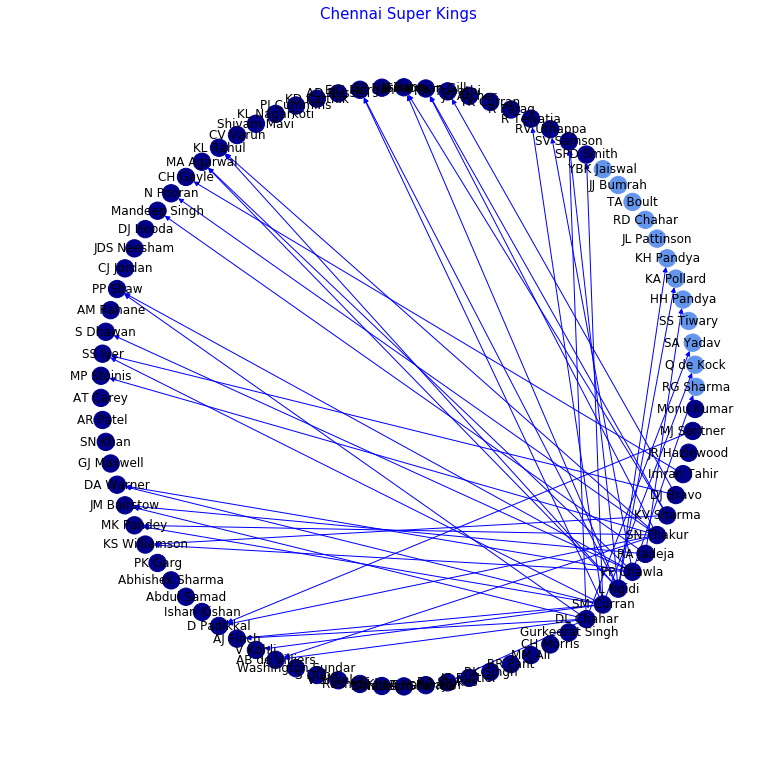

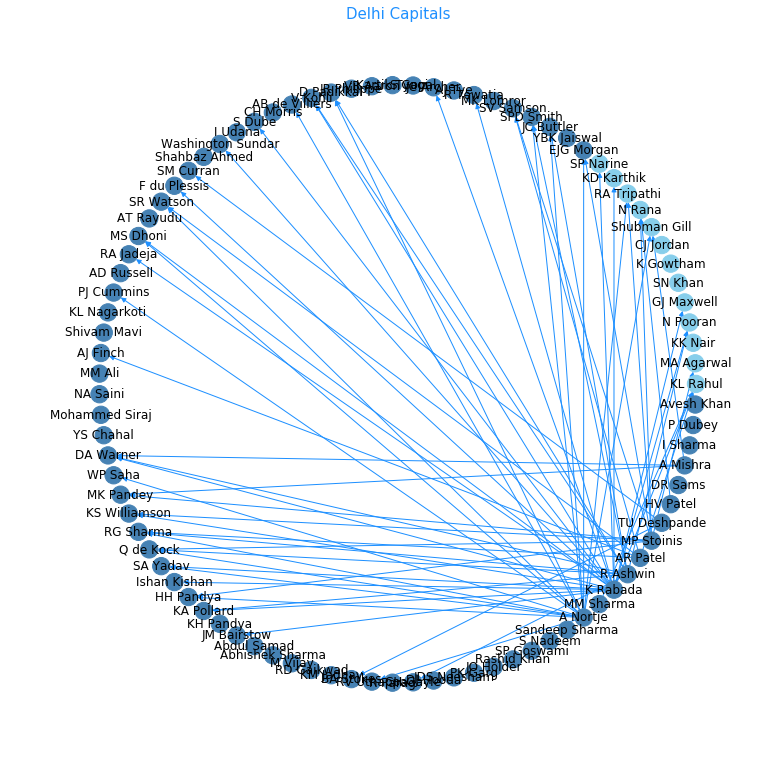

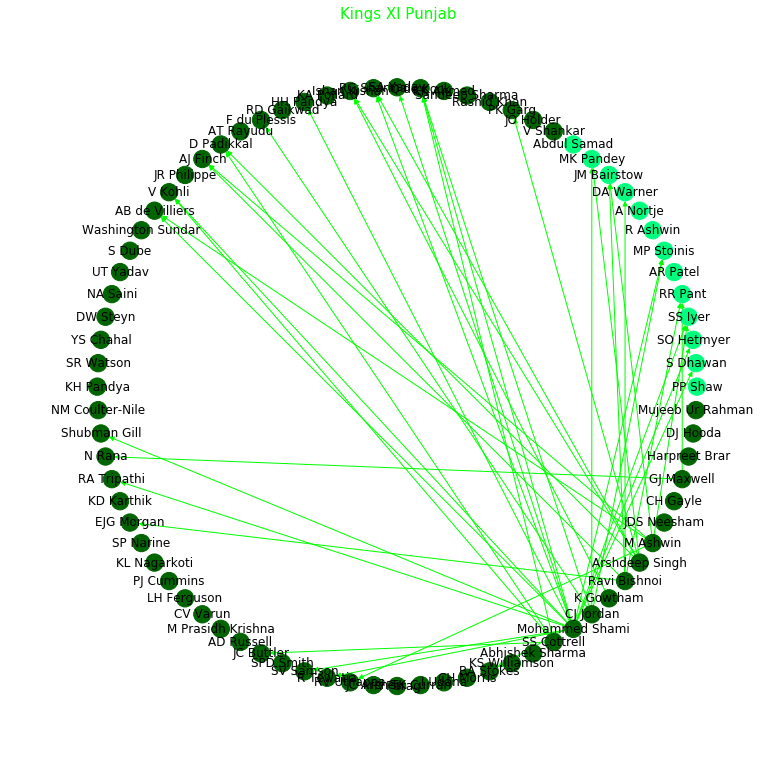

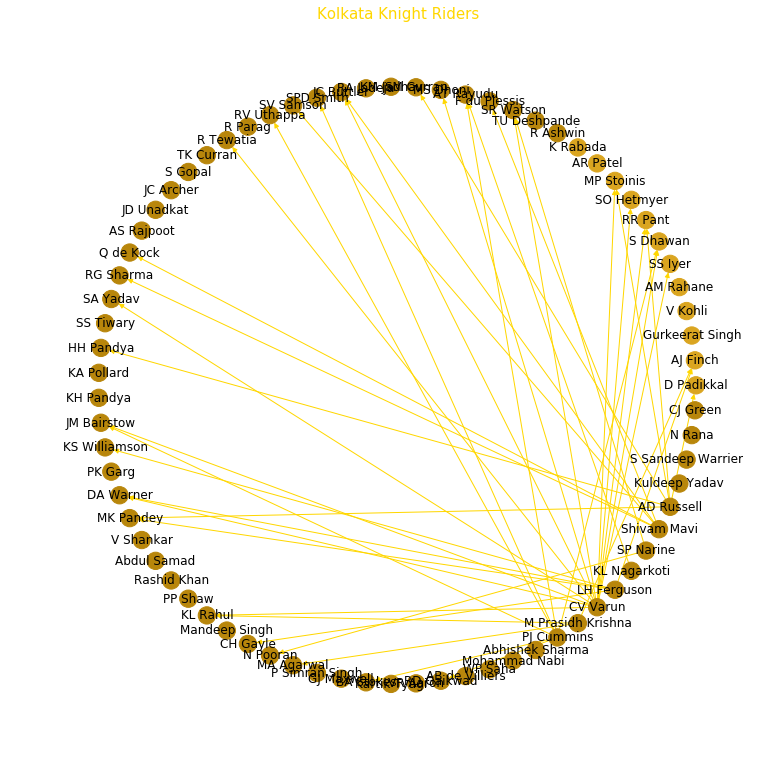

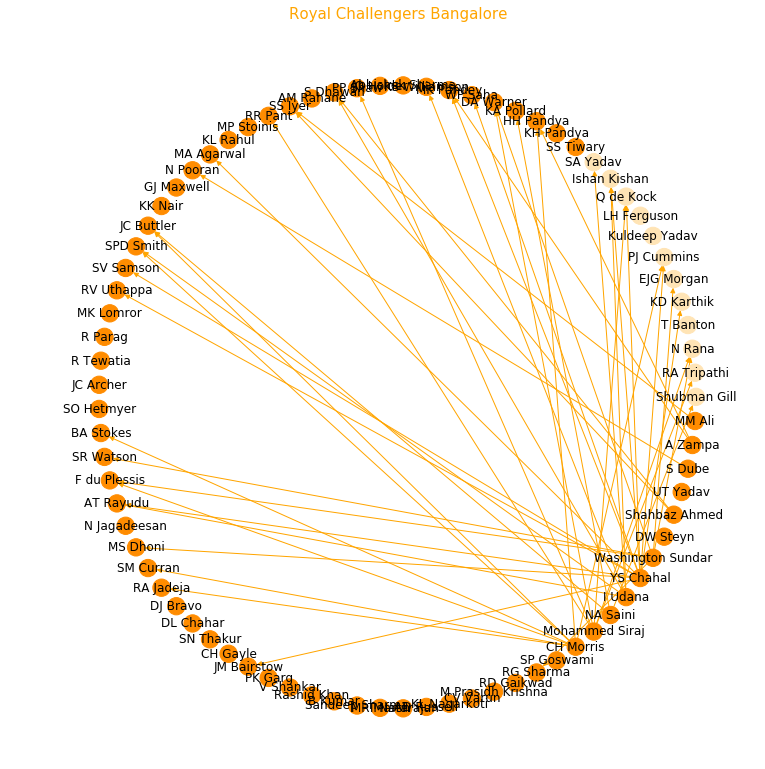

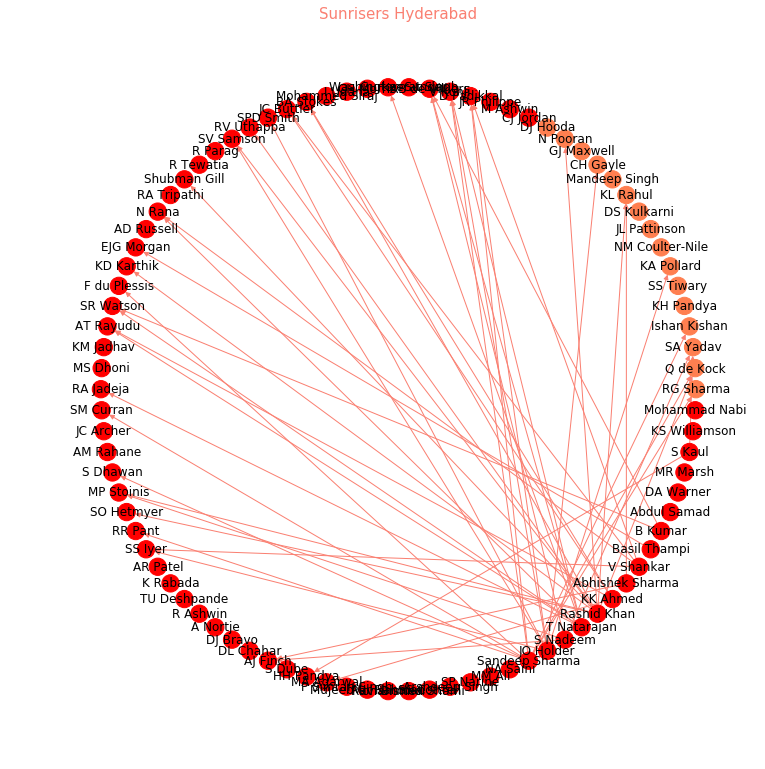

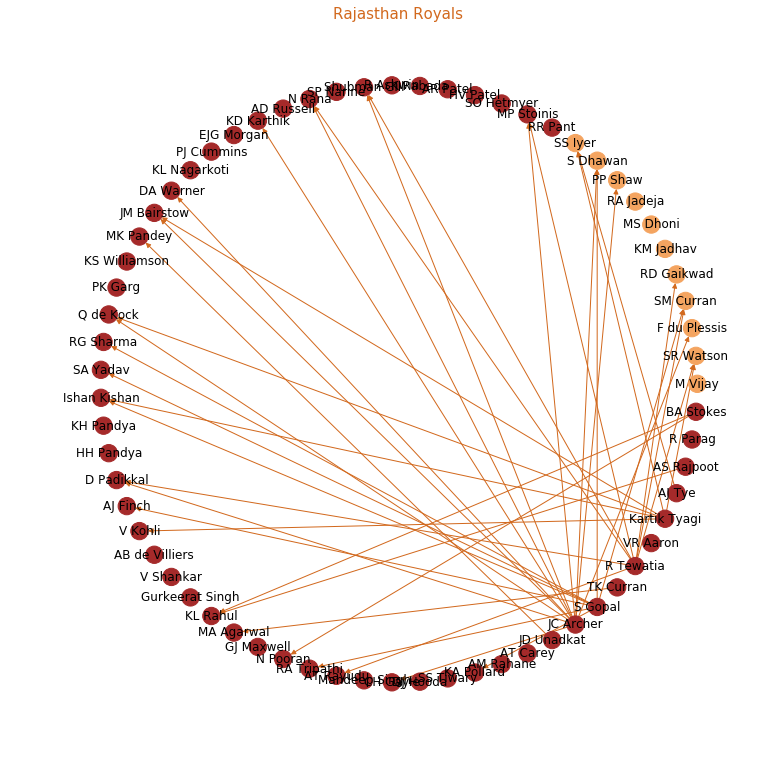

In [21]:
'''
for b in range(0,8):
    df_team=df[df['Batting Team']==arr[b]]    
    bat=df_team['batsman'].unique()
    ball=df_team['bowlers'].unique()
    G=nx.DiGraph()
    G.add_nodes_from(bat)
    G.add_nodes_from(ball)
    adj1=qib[b]
    for i in ball:
        for j in bat:
            if(adj1.loc[i,j]>=0.1+adj1.stack().mean()):
                G.add_edge(i,j,weight=adj1.loc[i,j])
    figure(figsize=(10,10))
    nx.draw_shell(G,with_labels=True)
'''

color_bat=['purple','darkblue','steelblue','darkgreen','darkgoldenrod','darkorange','red','brown']
color_ball=['orchid','cornflowerblue','skyblue','springgreen','goldenrod','moccasin','coral','sandybrown']
color_edge=['deeppink','blue','dodgerblue','lime','gold','orange','salmon','chocolate']
for b in range(0,8):
    df_team=df[df['Bowling Team']==arr[b]]    
    bat=df_team['batsman'].unique()
    ball=df_team['bowlers'].unique()
    G=nx.DiGraph()
    G.add_nodes_from(bat)
    G.add_nodes_from(ball)
    adj1=qib[b]
    color_map=[]
    total=bat.size+ball.size
    for i in range(total):
        if i < ball.size:
            color_map.append(color_ball[b])
        else: 
            color_map.append(color_bat[b])
    for i in ball:
        for j in bat:
            #if(adj1.loc[i,j]>=0.1+adj1.stack().mean()):
            if(adj1.loc[i,j]>0.1):
                G.add_edge(i,j,weight=adj1.loc[i,j])
    plt.figure(figsize=(10,10))
    nx.draw_shell(G, node_color=color_map, edge_color=color_edge[b], with_labels=True)
    plt.title(arr[b], size=15, color=color_edge[b])
    plt.show()

In [24]:
qib_centrality=[]
#os.remove("QIB_centality.csv")
for b in range(0,8):
    df_team=df[df['Bowling Team']==arr[b]]    
    bat=df_team['batsman'].unique()
    ball=df_team['bowlers'].unique()
    G=nx.DiGraph()
    G.add_nodes_from(bat)
    G.add_nodes_from(ball)
    adj1=qib[b]
    for i in ball:
        for j in bat:
            if(adj1.loc[i,j]>0.1):
                G.add_edge(i,j,weight=adj1.loc[i,j])
    degree_centrality = qib[b].sum(axis=1)
    close_centrality = nx.closeness_centrality(G, distance='weight')
    eigen_centrality = nx.eigenvector_centrality(G, max_iter=700, tol=1e-06, nstart=None, weight='weight')
    pr = nx.pagerank(G, alpha=0.9,weight='weight')
    cent = pd.DataFrame(list(degree_centrality.items()),columns = ['person','degree_centrality'],index=degree_centrality.keys())
    cent['close_centrality'] = cent['person'].map(close_centrality)
    cent['eigen_vector_centrality'] = cent['person'].map(eigen_centrality)
    cent['pagerank']=cent['person'].map(pr)
    del cent['person']
    qib_centrality.append(cent)
    cent.to_csv("QIB_centality.csv",mode='a')
qib_centrality

[                 degree_centrality  close_centrality  eigen_vector_centrality  \
 TA Boult                   7.51816          0.949831                 0.000704   
 JL Pattinson               2.39570          0.294010                 0.000704   
 JJ Bumrah                 10.69104          0.546592                 0.000704   
 KH Pandya                  1.21710          0.218921                 0.000704   
 RD Chahar                  3.82596          0.440783                 0.000704   
 DS Kulkarni                0.00000          0.000000                 0.000704   
 NM Coulter-Nile            1.30728          0.187615                 0.000704   
 KA Pollard                 1.00320          0.118541                 0.000704   
 J Yadav                    0.38270          0.062964                 0.000704   
 
                  pagerank  
 TA Boult         0.010965  
 JL Pattinson     0.010965  
 JJ Bumrah        0.010965  
 KH Pandya        0.010965  
 RD Chahar        0.010965  
 DS 